Importing all the libraries that we will need for machine learning

In [1]:
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')
from math import ceil
#Plots
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import parallel_coordinates
#Advanced optimization
from scipy import optimize as op
#Plot images
%matplotlib inline
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature

#Load Data
iris = pd.read_csv('processed_data.csv')
iris.head()

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


p       p.1       p.2       p.3  class
0  0.025479  0.025479  0.029400  0.021557    0.0
1  0.476073  0.476944  0.475805  0.472189    0.0
2  0.449531  0.449531  0.458780  0.453177    0.0
3  0.027451  0.027451  0.031373  0.031373    0.0
4  0.031640  0.031640  0.026885  0.030807    0.0

In [2]:
df = pd.read_csv('processed_data.csv')  
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [3]:
df = pd.DataFrame(X)
df.head(5)

0         1         2         3
0  0.025479  0.025479  0.029400  0.021557
1  0.476073  0.476944  0.475805  0.472189
2  0.449531  0.449531  0.458780  0.453177
3  0.027451  0.027451  0.031373  0.031373
4  0.031640  0.031640  0.026885  0.030807

In [4]:
print(X.shape)
zeros = np.zeros(X.shape[0])
print(zeros.shape)

idx = 0
new_col = zeros  # can be a list, a Series, an array or a scalar   
df.insert(loc=idx, column='p', value=new_col)

df.head(5)

xx = df

(399999, 4)
(399999,)


In [5]:
df = pd.DataFrame(xx)
df.head(5)

X = np.array(xx)
print(X)

[[ 0.          0.02547882  0.02547882  0.02940039  0.02155725]
 [ 0.          0.47607294  0.47694392  0.4758051   0.47218902]
 [ 0.          0.44953059  0.44953059  0.45878039  0.45317725]
 ..., 
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.29784118  0.30568431  0.30767137  0.30569922]
 [ 0.          0.02352941  0.02352941  0.02688549  0.02688549]]


In [6]:
df = pd.DataFrame(y)
df.head(5)

0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

In [7]:
Species = [0,1]
#Number of examples
m = iris.shape[0]  # number of examples = 150 
#Features
n = 4
#Number of classes
k = 2
#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

print(m)

399999


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

                                            LOGISTIC REGRESSION

Text(0.5,1,'Logistic Regression')

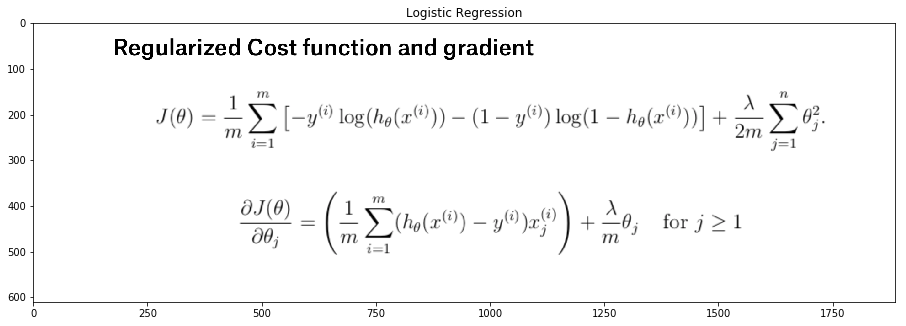

In [10]:
logistic_regression_image =  'Logistic Regression Formula.png'
lr = data.imread(logistic_regression_image)
# Displaying image
plt.figure(figsize=(34,34))
plt.subplot(121)
plt.imshow(lr)
plt.title('Logistic Regression')

In [14]:
#Logistic Regression

lam = 3 # was 0.1 

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Regularized cost function
def regCostFunction(theta, X, y, _lambda = lam):
    m = len(y)
    h = sigmoid(X.dot(theta))
    tmp = np.copy(theta)
    tmp[0] = 0 
    reg = (_lambda/(2*m)) * np.sum(tmp**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

#Regularized gradient function
def regGradient(theta, X, y, _lambda = lam):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    tmp = np.copy(theta)
    tmp[0] = 0
    reg = _lambda*tmp /m

    return ((1 / m) * X.T.dot(h - y)) + reg

#Optimal theta 
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x

In [15]:
#Training

all_theta = np.zeros((k, n + 1))

print(all_theta)
#One vs all
i = 0
for flower in Species:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [16]:
#Predictions
P = sigmoid(X_test.dot(all_theta.T)) #probability for each flower
p = [Species[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

Test Accuracy  87.65625 %


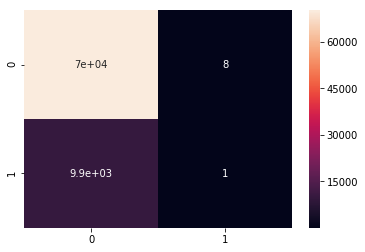

In [17]:
#Confusion Matrix
cfm = confusion_matrix(y_test, p, labels = Species)

sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species);

Text(0.5,1,'Retina Image')

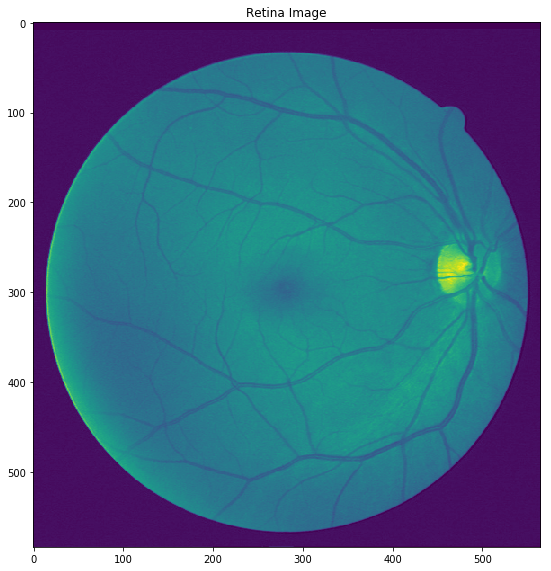

In [18]:
# Import Image 
# importing image for testing
retina_image =  '19_test.tif' 

# Converting image into grey scale 
retina = data.imread(retina_image)
retina_grey = color.rgb2grey(retina)

# Displaying image
plt.figure(figsize=(20,18))
plt.subplot(121)
plt.imshow(retina_grey)
plt.title('Retina Image')


In [19]:
#This function calculates how many squares fit along x_axis given our grid size and number of squares along y_axis
# We dont want image to end on a fraction of a grid
def rounding_function(rounding_image):#rounding down funcion 

    # rounding_image[1] is our image array size in pixels along x_axis(width)
    #we are rounding to nearest integer
    number_of_x_steps = rounding_image.shape[1]/grid_size
    round_down_number_x = math.floor(number_of_x_steps)
    
    
    # rounding_image[0] is our image array size in pixels along y_axis(length)
    #we are rounding to nearest integer
    number_of_y_steps = rounding_image.shape[0]/grid_size
    round_down_number_y = math.floor(number_of_y_steps)
    
    
    #Return array storing rounded off number of "grid steps" along width and length
    rounding = [round_down_number_x,round_down_number_y]
    return rounding

In [20]:
import math
stokes_list = []
big_stokes = []

grid_size = 2 

grid_rounding = rounding_function(retina_grey)

In [21]:
#Generate csv file for this image 


for y_itr in range(0,grid_rounding[1]): #grid_rounding[1]
    for x_itr in range(0,grid_rounding[0]):
        x = 0
        y = 0

        #image patch value
        arr = retina_grey[0 + grid_size*y_itr:grid_size + grid_size*y_itr,0 + grid_size*x_itr:grid_size + grid_size*x_itr]
        feature_vector = arr.flatten()
    


        stokes_line = feature_vector
        stokes_list.append(stokes_line)
    big_stokes = np.vstack(stokes_list)
    print(y_itr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
print(big_stokes)

[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 ..., 
 [ 0.02352941  0.02352941  0.          0.        ]
 [ 0.02352941  0.02352941  0.          0.        ]
 [ 0.02155725  0.02547882  0.          0.        ]]


In [23]:
df = pd.DataFrame(big_stokes)
df

0         1         2         3
0      0.000000  0.000000  0.000000  0.000000
1      0.000000  0.000000  0.000000  0.000000
2      0.000000  0.000000  0.000000  0.000000
3      0.000000  0.000000  0.000000  0.000000
4      0.000000  0.000000  0.000000  0.000000
5      0.000000  0.000000  0.000000  0.000000
6      0.000000  0.000000  0.000000  0.000000
7      0.000000  0.000000  0.000000  0.000000
8      0.000000  0.000000  0.000000  0.000000
9      0.000000  0.000000  0.000000  0.000000
10     0.000000  0.000000  0.000000  0.000000
11     0.000000  0.000000  0.000000  0.000000
12     0.000000  0.000000  0.000000  0.000000
13     0.000000  0.000000  0.000000  0.000000
14     0.000000  0.000000  0.000000  0.000000
15     0.000000  0.000000  0.000000  0.000000
16     0.000000  0.000000  0.000000  0.000000
17     0.000000  0.000000  0.000000  0.000000
18     0.000000  0.000000  0.000000  0.000000
19     0.000000  0.000000  0.000000  0.000000
20     0.000000  0.000000  0.000000  0.000000
21     0.000000  0.000000  0.000000  0.000000
22     0.000000  0.000000  0.000000  0.000000
23     0.000000  0.000000  0.000000  0.000000
24     0.000000  0.000000  0.000000  0.000000
25     0.000000  0.000000  0.000000  0.000000
26     0.000000  0.000000  0.000000  0.000000
27     0.000000  0.000000  0.000000  0.000000
28     0.000000  0.000000  0.000000  0.000000
29     0.000000  0.000000  0.000000  0.000000
...         ...       ...       ...       ...
82314  0.023529  0.023529  0.000000  0.000000
82315  0.027451  0.027451  0.000000  0.000000
82316  0.027451  0.023529  0.000000  0.000000
82317  0.023529  0.023529  0.000000  0.000000
82318  0.023529  0.027451  0.000000  0.000000
82319  0.027451  0.031373  0.000000  0.000000
82320  0.027451  0.023529  0.000000  0.000000
82321  0.027451  0.027451  0.000000  0.000000
82322  0.027451  0.027451  0.000000  0.000000
82323  0.023529  0.023529  0.000000  0.000000
82324  0.031373  0.031373  0.000000  0.003922
82325  0.035294  0.031373  0.003922  0.000000
82326  0.031373  0.031373  0.000000  0.000000
82327  0.027451  0.023529  0.000000  0.000000
82328  0.023529  0.023529  0.000000  0.000000
82329  0.019608  0.023529  0.000833  0.001949
82330  0.023529  0.023529  0.000833  0.000833
82331  0.027451  0.031373  0.000833  0.001949
82332  0.027451  0.023529  0.003922  0.000000
82333  0.023529  0.023529  0.000000  0.000000
82334  0.027451  0.023529  0.000000  0.000000
82335  0.027451  0.031373  0.000000  0.000000
82336  0.027451  0.027451  0.000000  0.000000
82337  0.031373  0.031373  0.000000  0.000000
82338  0.031373  0.031373  0.000000  0.000000
82339  0.031373  0.031373  0.000833  0.000833
82340  0.023529  0.023529  0.000000  0.000000
82341  0.023529  0.023529  0.000000  0.000000
82342  0.023529  0.023529  0.000000  0.000000
82343  0.021557  0.025479  0.000000  0.000000

[82344 rows x 4 columns]

In [24]:
df = pd.DataFrame(big_stokes)
df.to_csv('image.csv',index = False, header = False )

PLUG OUR IMAGE INTO CLASSIFIER

In [25]:
x_csv = pd.read_csv('image.csv')
x_csv.head(5)

0.0  0.0.1  0.0.2  0.0.3
0  0.0    0.0    0.0    0.0
1  0.0    0.0    0.0    0.0
2  0.0    0.0    0.0    0.0
3  0.0    0.0    0.0    0.0
4  0.0    0.0    0.0    0.0

In [26]:
zeros_csv = np.zeros(x_csv.shape[0]+1)
print(zeros_csv.shape)

idx_csv = 0
new_col_csv = zeros_csv  # can be a list, a Series, an array or a scalar   
df.insert(loc=idx_csv, column='p', value=new_col_csv)

df.head(5)

xx_csv = df

(82344,)


In [27]:
X_csv = np.array(xx_csv)
print(X_csv)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 ..., 
 [ 0.          0.02352941  0.02352941  0.          0.        ]
 [ 0.          0.02352941  0.02352941  0.          0.        ]
 [ 0.          0.02155725  0.02547882  0.          0.        ]]


In [28]:
P_image = sigmoid(X_csv.dot(all_theta.T)) #probability for each flower
p_image = [Species[np.argmax(P_image[i, :])] for i in range(X_csv.shape[0])]

print(p_image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 